<a href="https://colab.research.google.com/github/VivekAdluri/Explainable-AI-2482-Practical-/blob/main/Practical_1_2482.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1

Equation of the model: y = 0.60 + 2.00x
Slope: For each additional TV ad, car sales increase by 2.00
Intercept: If no TV ads are aired, 0.60 cars are expected to be sold
Predicted cars sold for 10 TV ads: 20.60


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


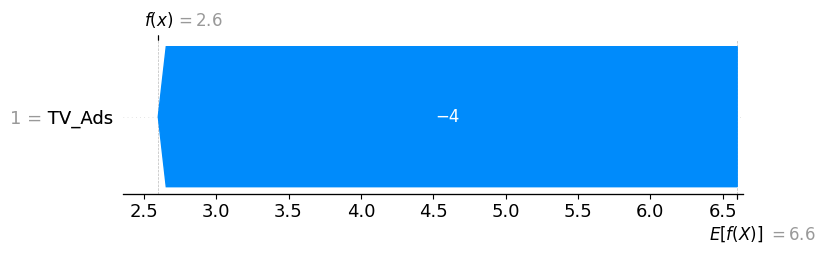

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import shap
data = pd.DataFrame({
    'TV_Ads': [1, 2, 3, 4, 5],
    'Cars_Sold': [3, 4, 7, 8, 11]
})
X = data[['TV_Ads']]
y = data['Cars_Sold']
model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_
print(f"Equation of the model: y = {intercept:.2f} + {slope:.2f}x")
print(f"Slope: For each additional TV ad, car sales increase by {slope:.2f}")
print(f"Intercept: If no TV ads are aired, {intercept:.2f} cars are expected to be sold")
prediction = model.predict([[10]])
print(f"Predicted cars sold for 10 TV ads: {prediction[0]:.2f}")
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
shap.plots.waterfall(shap_values[0])
shap.initjs()
shap.plots.force(shap_values)

2

----- Linear Regression Model -----
Equation: y = 5.73 + 0.50*IQ + 1.44*Study_Hours

----- Coefficient Interpretation -----
• IQ Coefficient: 0.50 → For each increase of 1 IQ point, test score increases by 0.50
• Study Hours Coefficient: 1.44 → For each additional hour studied, test score increases by 1.44
• Intercept: 5.73 → Predicted score when IQ=0 and Study Hours=0 (not realistic but mathematically valid)

----- Prediction -----
Predicted test score for IQ=95 and Study Hours=25: 89.42

----- SHAP Analysis -----


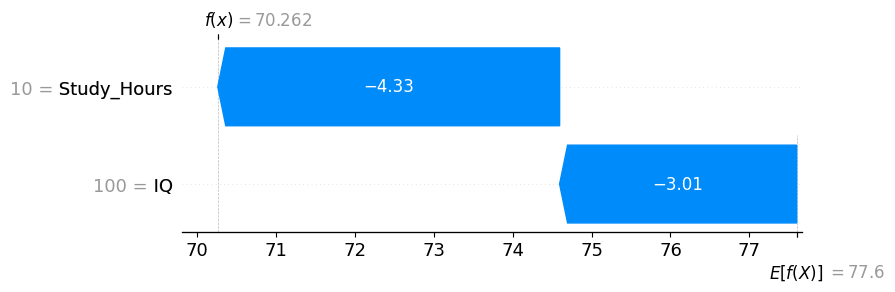


----- SHAP Value Interpretation -----
  Student_ID        IQ  Study_Hours
0  Student_1 -3.005286    -4.333150
1  Student_2  2.003524     2.888767
2  Student_3 -0.500881    -1.444383
3  Student_4 -5.509692    10.110683
4  Student_5  7.012335    -7.221916

Students where Study Hours contributed more than IQ:
  Student_ID        IQ  Study_Hours
1  Student_2  2.003524     2.888767
3  Student_4 -5.509692    10.110683


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import shap
data = pd.DataFrame({
    'IQ': [100, 110, 105, 95, 120],
    'Study_Hours': [10, 15, 12, 20, 8],
    'Test_Score': [70, 85, 78, 80, 75]
})
X = data[['IQ', 'Study_Hours']]
y = data['Test_Score']
model = LinearRegression()
model.fit(X, y)
coef_iq = model.coef_[0]
coef_study = model.coef_[1]
intercept = model.intercept_

print("----- Linear Regression Model -----")
print(f"Equation: y = {intercept:.2f} + {coef_iq:.2f}*IQ + {coef_study:.2f}*Study_Hours")
print("\n----- Coefficient Interpretation -----")
print(f"• IQ Coefficient: {coef_iq:.2f} → For each increase of 1 IQ point, test score increases by {coef_iq:.2f}")
print(f"• Study Hours Coefficient: {coef_study:.2f} → For each additional hour studied, test score increases by {coef_study:.2f}")
print(f"• Intercept: {intercept:.2f} → Predicted score when IQ=0 and Study Hours=0 (not realistic but mathematically valid)")
new_input = pd.DataFrame({'IQ': [95], 'Study_Hours': [25]})
predicted_score = model.predict(new_input)[0]
print("\n----- Prediction -----")
print(f"Predicted test score for IQ=95 and Study Hours=25: {predicted_score:.2f}")
print("\n----- SHAP Analysis -----")
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[0], show=True)

shap.initjs()
shap.plots.force(shap_values)

print("\n----- SHAP Value Interpretation -----")
shap_df = pd.DataFrame(shap_values.values, columns=X.columns)
shap_df['Total_Impact'] = shap_df.sum(axis=1)
shap_df['Student_ID'] = ['Student_1', 'Student_2', 'Student_3', 'Student_4', 'Student_5']
print(shap_df[['Student_ID', 'IQ', 'Study_Hours']])

greater_study_hours = shap_df[shap_df['Study_Hours'] > shap_df['IQ']]
print("\nStudents where Study Hours contributed more than IQ:")
print(greater_study_hours[['Student_ID', 'IQ', 'Study_Hours']])

3

----- Linear Regression Model -----
Equation: y = 40845.12 + 4875.78 * YearsExperience

----- Interpretation -----
• Slope: For each additional year of experience, salary increases by approx ₹4875.78
• Intercept: Base salary (when experience = 0) is approx ₹40845.12

----- Predictions -----
Predicted salary for 3.5 years of experience: ₹57910.37
Predicted salary for 7 years of experience: ₹74975.61

----- SHAP Analysis -----


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


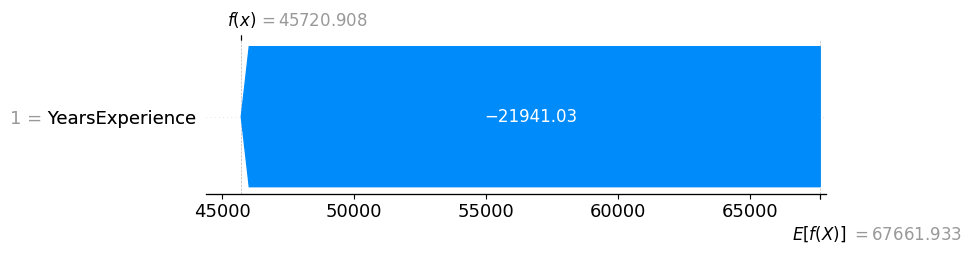

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import shap
data = pd.DataFrame({
    'YearsExperience': np.linspace(1, 10, 30),
    'Salary': [40000 + 5000 * x + np.random.randint(-2000, 2000) for x in np.linspace(1, 10, 30)]
})
X = data[['YearsExperience']]
y = data['Salary']
model = LinearRegression()
model.fit(X, y)
intercept = model.intercept_
slope = model.coef_[0]
print("----- Linear Regression Model -----")
print(f"Equation: y = {intercept:.2f} + {slope:.2f} * YearsExperience")
print("\n----- Interpretation -----")
print(f"• Slope: For each additional year of experience, salary increases by approx ₹{slope:.2f}")
print(f"• Intercept: Base salary (when experience = 0) is approx ₹{intercept:.2f}")
experience_values = [[3.5], [7]]
predictions = model.predict(experience_values)

print("\n----- Predictions -----")
print(f"Predicted salary for 3.5 years of experience: ₹{predictions[0]:.2f}")
print(f"Predicted salary for 7 years of experience: ₹{predictions[1]:.2f}")
print("\n----- SHAP Analysis -----")
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
shap.plots.waterfall(shap_values[0], show=True)

shap.initjs()
shap.plots.force(shap_values)

4

✅ Model Equation:
Sales = -269.81 + 41.13 * Intelligence + 59.60 * Extroversion

📘 Coefficient Interpretation:
• Intelligence Coefficient: 41.13 (per IQ point)
• Extroversion Coefficient: 59.60 (per extroversion point)
• Intercept: -269.81 (base sales with zero scores)

🔮 Predictions:
• For Intelligence=100, Extroversion=25 → Sales: $5332.86
• For Intelligence=120, Extroversion=18 → Sales: $5738.24

📊 SHAP Waterfall Plot:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


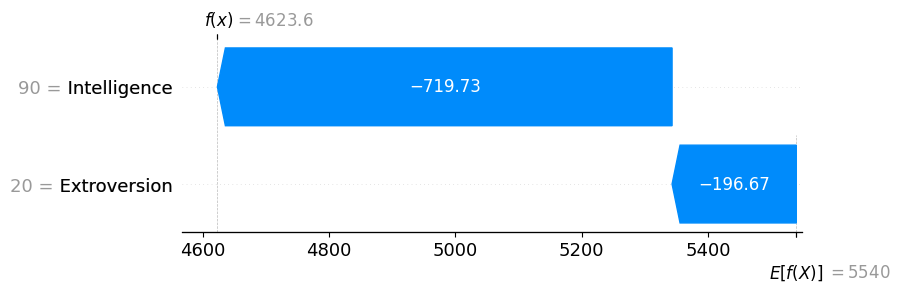


📊 SHAP Force Plot:



📊 SHAP Summary Plot:


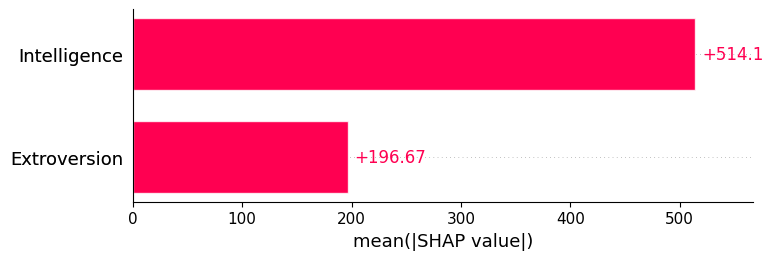

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import shap
import matplotlib.pyplot as plt
int_ext_df = pd.DataFrame({
    'Intelligence': [90, 110, 95, 120, 105, 130, 100, 85, 115, 125],
    'Extroversion': [20, 25, 18, 22, 28, 19, 24, 21, 26, 30],
    'Sales': [4500, 6000, 4700, 6200, 5800, 6100, 5500, 4300, 5900, 6400]
})
X = int_ext_df[['Intelligence', 'Extroversion']]
y = int_ext_df['Sales']
model = LinearRegression()
model.fit(X, y)
print("✅ Model Equation:")
print(f"Sales = {model.intercept_:.2f} + {model.coef_[0]:.2f} * Intelligence + {model.coef_[1]:.2f} * Extroversion")
print("\n📘 Coefficient Interpretation:")
print(f"• Intelligence Coefficient: {model.coef_[0]:.2f} (per IQ point)")
print(f"• Extroversion Coefficient: {model.coef_[1]:.2f} (per extroversion point)")
print(f"• Intercept: {model.intercept_:.2f} (base sales with zero scores)")

pred1 = model.predict([[100, 25]])[0]
pred2 = model.predict([[120, 18]])[0]
print("\n🔮 Predictions:")
print(f"• For Intelligence=100, Extroversion=25 → Sales: ${pred1:.2f}")
print(f"• For Intelligence=120, Extroversion=18 → Sales: ${pred2:.2f}")
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
print("\n📊 SHAP Waterfall Plot:")
shap.plots.waterfall(shap_values[0], show=True)
print("\n📊 SHAP Force Plot:")
shap.initjs()
shap.plots.force(shap_values)
print("\n📊 SHAP Summary Plot:")
shap.plots.bar(shap_values)

5

✅ Marketing Model Equation:
Sales = 2.11 + 0.19 * Facebook + 0.07 * Newspaper

📘 Coefficient Interpretation:
• Facebook Coefficient: 0.19
• Newspaper Coefficient: 0.07
• Intercept: 2.11

🔮 Predictions:
• Facebook=50, Newspaper=70 → Sales: 16.90K
• Facebook=25, Newspaper=30 → Sales: 9.14K

📊 SHAP Waterfall Plot:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


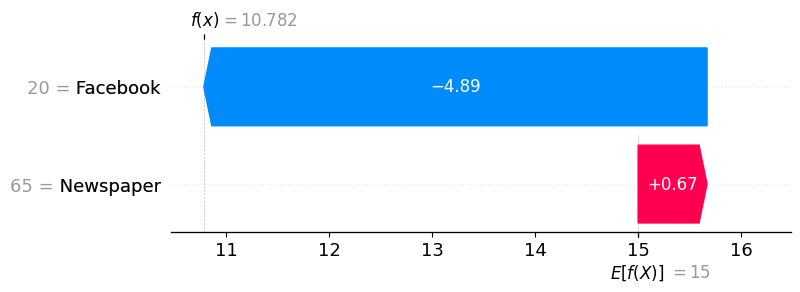


📊 SHAP Force Plot:



📊 SHAP Summary Plot:


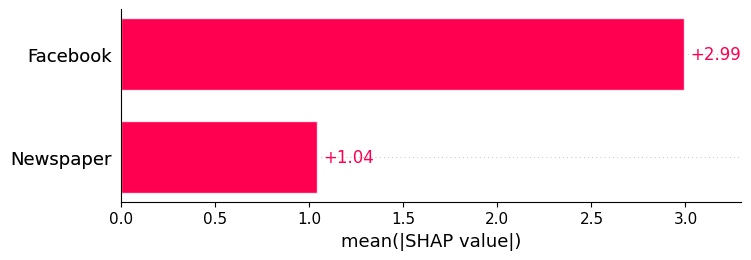

In [ ]:
marketing_df = pd.DataFrame({
    'Facebook': [20, 35, 40, 60, 80, 50, 45, 30, 25, 70],
    'Newspaper': [65, 70, 50, 30, 40, 80, 75, 55, 60, 35],
    'Sales': [10, 12, 14, 18, 20, 19, 17, 13, 11, 16]  # in $1000s
})
X2 = marketing_df[['Facebook', 'Newspaper']]
y2 = marketing_df['Sales']
model2 = LinearRegression()
model2.fit(X2, y2)
print("✅ Marketing Model Equation:")
print(f"Sales = {model2.intercept_:.2f} + {model2.coef_[0]:.2f} * Facebook + {model2.coef_[1]:.2f} * Newspaper")
print("\n📘 Coefficient Interpretation:")
print(f"• Facebook Coefficient: {model2.coef_[0]:.2f}")
print(f"• Newspaper Coefficient: {model2.coef_[1]:.2f}")
print(f"• Intercept: {model2.intercept_:.2f}")

mpred1 = model2.predict([[50, 70]])[0]
mpred2 = model2.predict([[25, 30]])[0]
print("\n🔮 Predictions:")
print(f"• Facebook=50, Newspaper=70 → Sales: {mpred1:.2f}K")
print(f"• Facebook=25, Newspaper=30 → Sales: {mpred2:.2f}K")
explainer2 = shap.Explainer(model2, X2)
shap_values2 = explainer2(X2)
print("\n📊 SHAP Waterfall Plot:")
shap.plots.waterfall(shap_values2[0], show=True)

print("\n📊 SHAP Force Plot:")
shap.initjs()
shap.plots.force(shap_values2)

print("\n📊 SHAP Summary Plot:")
shap.plots.bar(shap_values2)